## CIND 820 - Big Data Analytics Project  
### Initial Results and Code (10% of the final grade) 
### Due on November 21, 2022 11:59 PM


####[Kabir Chauhan (501182498)]


*****


### **I) Data Preparation**

In [5]:
#import the dataset and appropriate modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pdac = pd.read_csv("Debernardi et al 2020 data.csv", sep =",")

#print the row count
print("The row count for the PDAC dataset is:", len(pdac))

The row count for the PDAC dataset is: 590


In [6]:
#summary of dataset
pdac.info()
pdac.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [7]:
#check the data types of attributes
print(pdac.dtypes)

sample_id                   object
patient_cohort              object
sample_origin               object
age                          int64
sex                         object
diagnosis                    int64
stage                       object
benign_sample_diagnosis     object
plasma_CA19_9              float64
creatinine                 float64
LYVE1                      float64
REG1B                      float64
TFF1                       float64
REG1A                      float64
dtype: object


In [8]:
#check for missing values
pdac.isnull().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [9]:
#remove the unused columns in a new dataframe and rename columns
pdac_modified = pdac.drop(columns=['sample_id','patient_cohort','sample_origin','stage','benign_sample_diagnosis'])

pdac_modified = pdac_modified.rename(columns={'diagnosis':'dx','plasma_CA19_9':'CA19','creatinine':'CREAT'})
pdac_modified.head()

,age,sex,dx,CA19,CREAT,LYVE1,REG1B,TFF1,REG1A
0,33,F,1,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,81,F,1,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,51,M,1,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,61,M,1,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,62,M,1,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [11]:
#call a function to replace missing values with the mean value for each respective column
for i in pdac_modified:
    if i!='sex':
        pdac_modified[i] = pdac_modified[i].fillna(pdac_modified[i].mean())

pdac_modified.head()

,age,sex,dx,CA19,CREAT,LYVE1,REG1B,TFF1,REG1A
0,33,F,1,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000
1,81,F,1,654.002944,0.97266,2.037585,94.46703,209.488250,228.407000
2,51,M,1,7.000000,0.78039,0.145589,102.36600,461.141000,735.281222
3,61,M,1,8.000000,0.70122,0.002805,60.57900,142.950000,735.281222
4,62,M,1,9.000000,0.21489,0.000860,65.54000,41.088000,735.281222


In [12]:
#confirm no missing values
pdac_modified.isnull().sum()

age      0
sex      0
dx       0
CA19     0
CREAT    0
LYVE1    0
REG1B    0
TFF1     0
REG1A    0
dtype: int64

### **II) Data Exploration**

In [13]:
#check for correlation between biomarkers
pdac_modified[pdac_modified.columns[3:]].corr()

,CA19,CREAT,LYVE1,REG1B,TFF1,REG1A
CA19,1.000000,-0.023064,0.204001,0.134020,0.132608,0.108028
CREAT,-0.023064,1.000000,0.338533,0.261906,0.397795,0.045632
LYVE1,0.204001,0.338533,1.000000,0.543075,0.577363,0.201722
REG1B,0.134020,0.261906,0.543075,1.000000,0.690228,0.347205
TFF1,0.132608,0.397795,0.577363,0.690228,1.000000,0.268068
REG1A,0.108028,0.045632,0.201722,0.347205,0.268068,1.000000


(array([183.,   0.,   0.,   0., 208.,   0.,   0.,   0., 199.]),
 array([1.        , 1.22222222, 1.44444444, 1.66666667, 1.88888889,
        2.11111111, 2.33333333, 2.55555556, 2.77777778, 3.        ]),
 <a list of 9 Patch objects>)

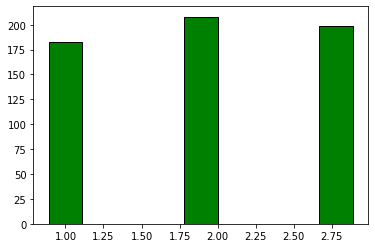

In [14]:
#visalize the distribution of 'diagnosis' in the population 
plt.hist(pdac_modified['dx'], bins=9, align='left', color='green', edgecolor='black')

In [ ]:
#data normalization prior to EDA

#copy the data
#normalized_pdac = pdac_modified.copy()
#normalized_pdac = normalized_pdac.drop(normalized_pdac.columns[[0, 1, 2]], axis = 1)

#apply normalization
#for column in normalized_pdac.columns:
 #    normalized_pdac[column] = (normalized_pdac[column] - normalized_pdac[column].min()) / (normalized_pdac[column].max() - normalized_pdac[column].min())    
  
#view normalized data

#normalized_pdac.head()

In [ ]:
#normalized_pdac = pdac_modified.iloc[:,3:]
#pdac_modified.iloc[:,3:] = (normalized_pdac - normalized_pdac.min()) / (normalized_pdac.max() - normalized_pdac.min())

#pdac_modified.head()

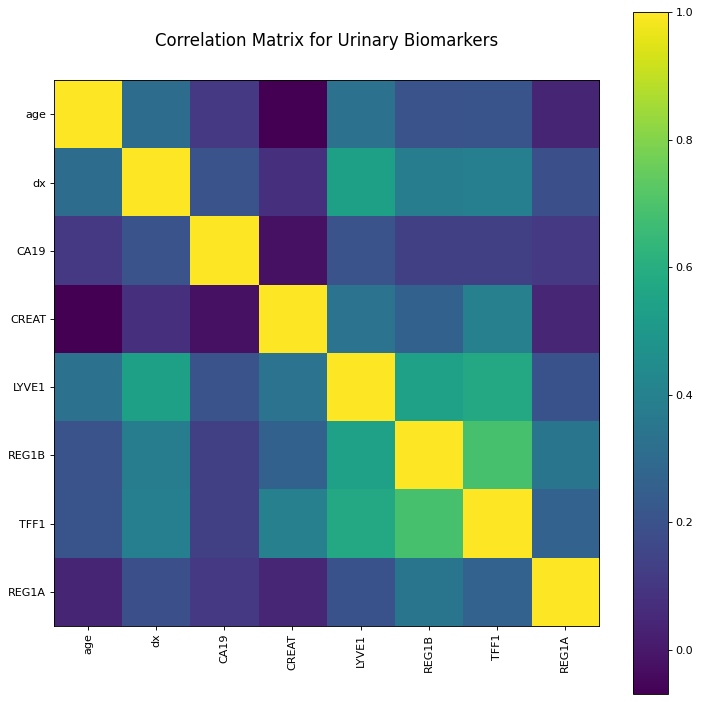

In [15]:
#call a function to visualize the correlation between different biomarkers
def correlationMatrix(df, graphWidth):

    
    df = df[[col for col in df if df[col].nunique() > 1]] #keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix for Urinary Biomarkers', fontsize=15)
    plt.show()

correlationMatrix(pdac_modified, 11)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


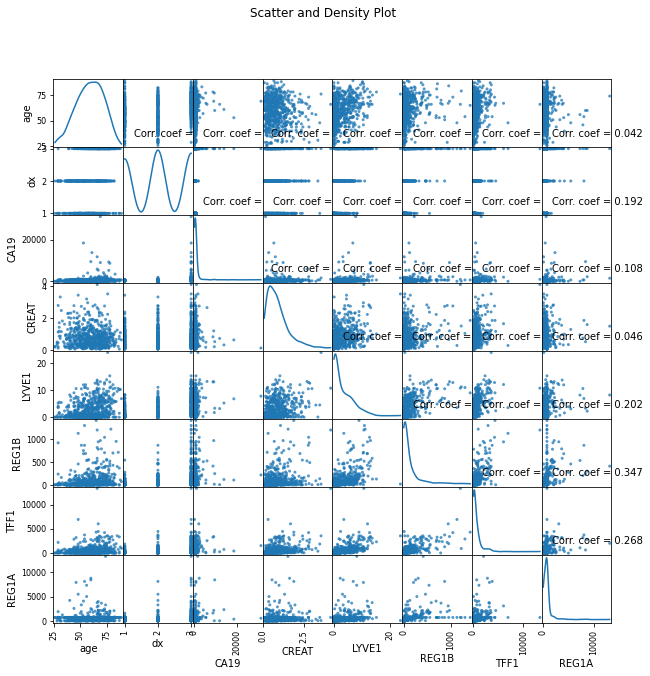

In [16]:
#call a function to visualize the correlation between biomarkers and other attributes
def plotMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) #use only numerical columns
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] #only keep columns with >1 unique value
    
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotMatrix(pdac_modified, 10, 10)

In [17]:
#normalize the dataset and concatenate with discrete variables
s1,s0 = np.split(pdac_modified,[3],axis=1)
normalized_pdac = pd.concat([s1,(s0 - s0.min()) / (s0.max() - s0.min())],axis=1)

normalized_pdac.head()

,age,sex,dx,CA19,CREAT,LYVE1,REG1B,TFF1,REG1A
0,33,F,1,0.000377,0.437326,0.037383,0.037715,0.04903,0.095606
1,81,F,1,0.021097,0.225627,0.085284,0.067288,0.015698,0.017304
2,51,M,1,0.000226,0.178273,0.006089,0.072915,0.034557,0.055703
3,61,M,1,0.000258,0.158774,0.000112,0.04315,0.010712,0.055703
4,62,M,1,0.00029,0.038997,0.000031,0.046684,0.003079,0.055703


Text(0, 0.5, 'Age')

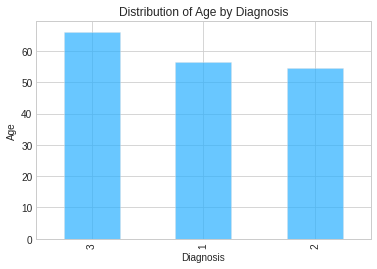

In [18]:
#visualize the distribution of age by diagnosis in the dataset
plt.style.use('seaborn-whitegrid')
plot1 = normalized_pdac.groupby('dx')['age'].mean().nlargest(20).plot.bar(facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
plt.title('Distribution of Age by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Age')

Text(0, 0.5, 'Diagnosis')

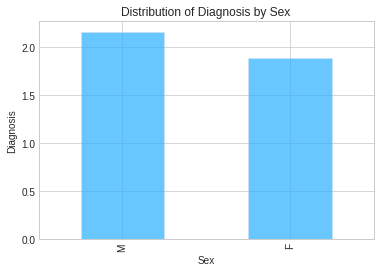

In [19]:
#visualize the distribution of diagnosis by gender in the dataset
plot2 = normalized_pdac.groupby('sex')['dx'].mean().nlargest(20).plot.bar(facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
plt.title('Distribution of Diagnosis by Sex')
plt.xlabel('Sex')
plt.ylabel('Diagnosis')

### **III) Classification Machine Learning Algorithms**

#### **a) Algorithm 1 - Decision Tree**



In [20]:
#convert the nominal gender variable to numeric
normalized_pdac['sex'].replace({'M':1, 'F':0}, inplace=True)

normalized_pdac.head()

,age,sex,dx,CA19,CREAT,LYVE1,REG1B,TFF1,REG1A
0,33,0,1,0.000377,0.437326,0.037383,0.037715,0.04903,0.095606
1,81,0,1,0.021097,0.225627,0.085284,0.067288,0.015698,0.017304
2,51,1,1,0.000226,0.178273,0.006089,0.072915,0.034557,0.055703
3,61,1,1,0.000258,0.158774,0.000112,0.04315,0.010712,0.055703
4,62,1,1,0.00029,0.038997,0.000031,0.046684,0.003079,0.055703


In [51]:
#implement a train-test split
from sklearn.model_selection import train_test_split


#target='dx'
#x = df.drop(target, axis=1)
#y = df[target]

X_train, X_test, y_train, y_test = train_test_split(normalized_pdac[normalized_pdac.columns[3:8]], normalized_pdac[normalized_pdac.columns[2]], test_size = 0.20, random_state = 25)

In [52]:
#fit Decision Tree classifier to the dataset
from sklearn.tree import DecisionTreeClassifier
y_train = y_train.astype('int')

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
#demonstrate prediction
y_pred = dt.predict(X_test)
print(y_pred[:5])

[1 3 2 1 1]


In [62]:
#implmented stratified k-fold cross validation
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=25)
cnt = 1
for train_index, test_index in kf.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1



Fold:1, Train set: 377, Test set:95
Fold:2, Train set: 377, Test set:95
Fold:3, Train set: 378, Test set:94
Fold:4, Train set: 378, Test set:94
Fold:5, Train set: 378, Test set:94


In [63]:
#obtain the scores for each fold and the average
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 25), X_train, y_train, cv= kf, scoring="accuracy")

print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.64210526 0.57894737 0.56382979 0.59574468 0.56382979]
Average score: 0.59


[[23 13  0]
 [12 19 14]
 [ 2  4 31]]


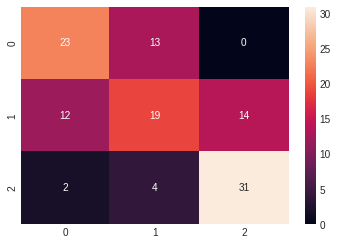

In [69]:
#generate a confusion matrix and visualize the results
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(list(y_test.values), y_pred)
print(cm)

f = sns.heatmap(cm, annot=True, fmt='d')

In [66]:
#calculate sensitivity, specificity, positive/negative predictive values, f1-score

from sklearn.metrics import f1_score
#f1 score is defined as: 2 * (precision * recall) / (precision + recall)

total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity is: ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity is: ', specificity)

ppv = cm[0,0]/(cm[0,0]+cm[0,1])
print('ppv is: ', ppv )

npv = cm[1,1]/(cm[1,0]+cm[1,1])
print('npv is: ', npv)

F1Score = f1_score(list(y_test.values), y_pred, average='micro') #alternative averages include: binary, macro, weighted, samples
print('F1 Score is : ', F1Score)

Sensitivity is:  0.6571428571428571
Specificity is:  0.59375
ppv is:  0.6388888888888888
npv is:  0.6129032258064516
F1 Score is :  0.6186440677966102


In [67]:
#use package classification report for pre-calcualted values
print(classification_report(list(y_test.values), y_pred))

              precision    recall  f1-score   support

           1       0.62      0.64      0.63        36
           2       0.53      0.42      0.47        45
           3       0.69      0.84      0.76        37

    accuracy                           0.62       118
   macro avg       0.61      0.63      0.62       118
weighted avg       0.61      0.62      0.61       118



#### **b) Algorithm 2 - kNN Classification**

In [70]:
#fit kNN classifier to dataset
from sklearn.neighbors import KNeighborsClassifier
y_train=y_train.astype('int')
knn = KNeighborsClassifier()
 
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [71]:
#demonstrate prediction
print(pred[:5])

[1 3 2 1 2]


In [81]:
#implmented stratified k-fold cross validation

kf_knn = StratifiedKFold(n_splits=5, shuffle=True, random_state=25)
cnt = 1
for train_index, test_index in kf_knn.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 377, Test set:95
Fold:2, Train set: 377, Test set:95
Fold:3, Train set: 378, Test set:94
Fold:4, Train set: 378, Test set:94
Fold:5, Train set: 378, Test set:94


In [85]:
#obtain the scores for each fold and the average
score = cross_val_score(KNeighborsClassifier(), X_train, y_train, cv= kf_knn, scoring="accuracy")

print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.6        0.53684211 0.4893617  0.58510638 0.57446809]
Average score: 0.56


[[21 14  1]
 [19 16 10]
 [ 6  7 24]]


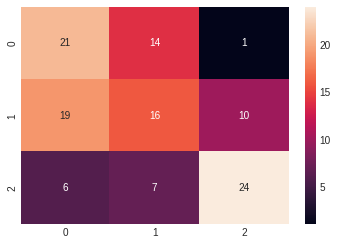

In [72]:
#generate a confusion matrix and visualize the results
cm2 = confusion_matrix(list(y_test.values), pred)
print(cm2)

f = sns.heatmap(cm2, annot=True, fmt='d')

In [73]:
#calculate sensitivity, specificity, positive/negative predictive values, f1-score
total=sum(sum(cm2))

sensitivity = cm2[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm2[1,1]/(cm2[1,1]+cm2[0,1])
print('Specificity : ', specificity)

total=sum(sum(cm2))

ppv = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('ppv : ', ppv )

npv = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('npv : ', npv)

F1Score1 = f1_score(list(y_test.values), pred, average='micro')
print('F1 Score is : ', F1Score1)

Sensitivity :  0.6
Specificity :  0.5333333333333333
ppv :  0.6
npv :  0.45714285714285713
F1 Score is :  0.5169491525423728


In [80]:
#use package classification report for pre-calcualted values
print(classification_report(list(y_test.values), pred))

              precision    recall  f1-score   support

           1       0.46      0.58      0.51        36
           2       0.43      0.36      0.39        45
           3       0.69      0.65      0.67        37

    accuracy                           0.52       118
   macro avg       0.52      0.53      0.52       118
weighted avg       0.52      0.52      0.51       118

